**In this Dataset we are going to explore a data set based on trave insurence based on that we are going to prediict what are the chance of a customer or a traveller claiming travel insurence**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix


sns.set_style({'xtick.bottom': False,
               'ytick.left': False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False,
 })

In [67]:
data = pd.read_csv('travel_insurance.csv')
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


**Lets check if there are any null values**

In [68]:
data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

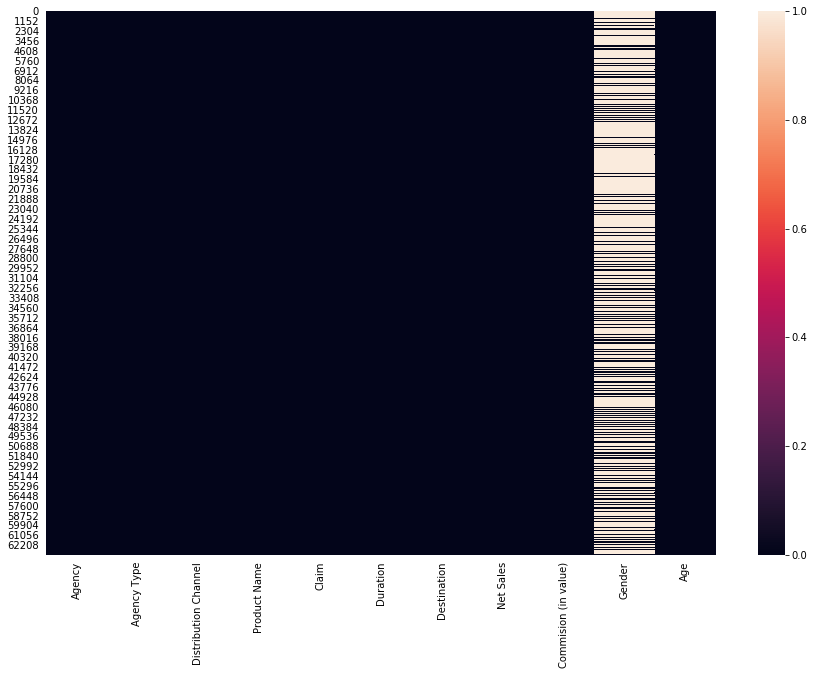

In [69]:
fig,ax1 = plt.subplots(figsize=(15,10))
sns.heatmap(data.isnull(),ax=ax1)

In [70]:
(data.isnull().sum()/data.shape[0])*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

**Looks like we have more than 70% of missing values in Gender so lets drop that feature**

In [71]:
data.drop(['Gender'],axis=1,inplace=True)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


In [73]:
data.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,43.000000


## EDA

In [74]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


** 1. Which Agency has clamed most travel insurance**

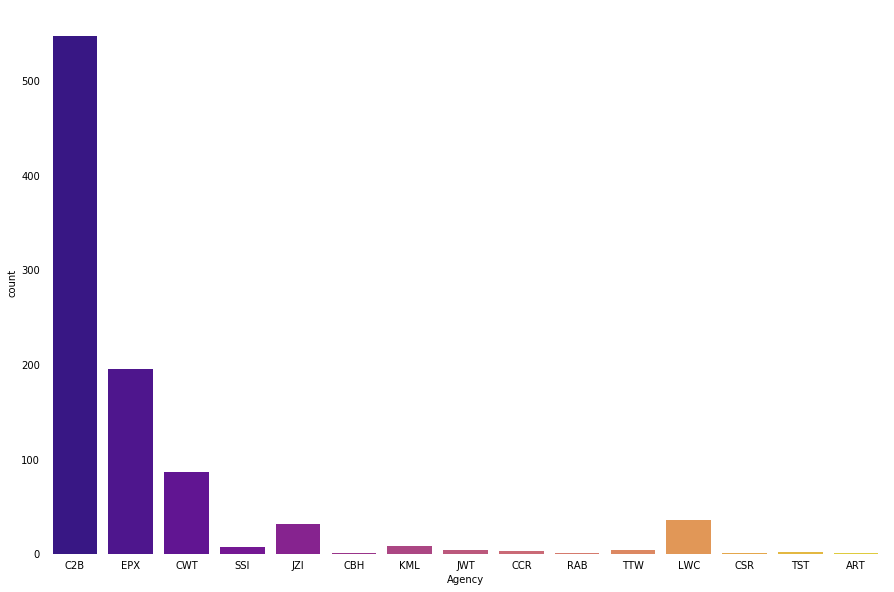

In [75]:
fig,ax1 = plt.subplots(figsize=(15,10))
sns.countplot(data[data['Claim']=='Yes']['Agency'],ax=ax1,palette='plasma')

** 2.Which Agency type has cliamed most travel insurance**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B9F96A0>],
      dtype=object)

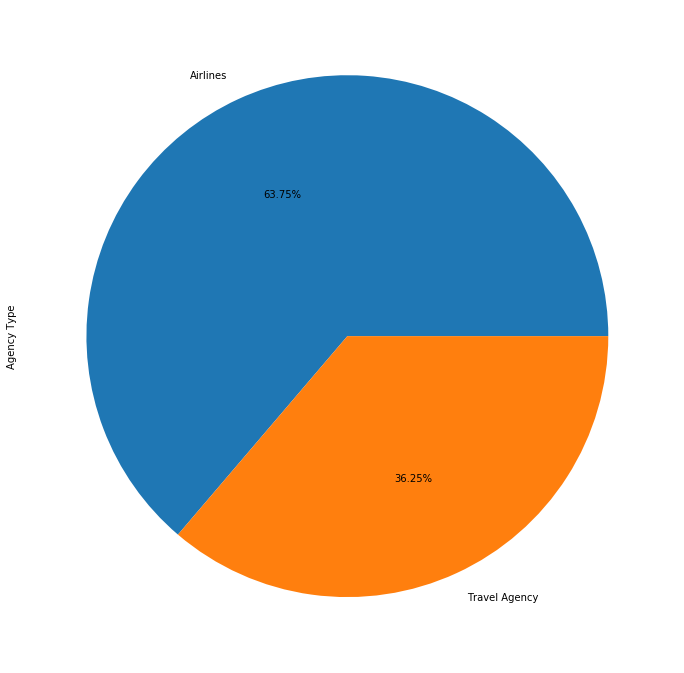

In [76]:
data[data['Claim']=='Yes']['Agency Type'].value_counts().plot.pie(subplots=True,figsize=(12,12),autopct='%.2f%%',)

** 3.What is the most preferred Distrubution channel**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BA1CEF0>],
      dtype=object)

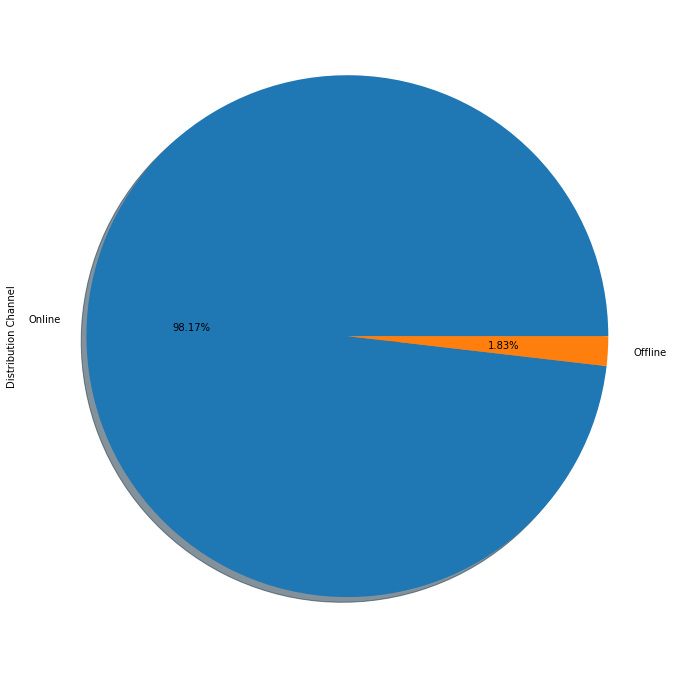

In [77]:
data[data['Claim']=='Yes']['Distribution Channel'].value_counts().plot.pie(subplots=True,shadow=True,figsize=(12,12),autopct='%.2f%%')

**4.Which Plan or Product Claimed mostly **

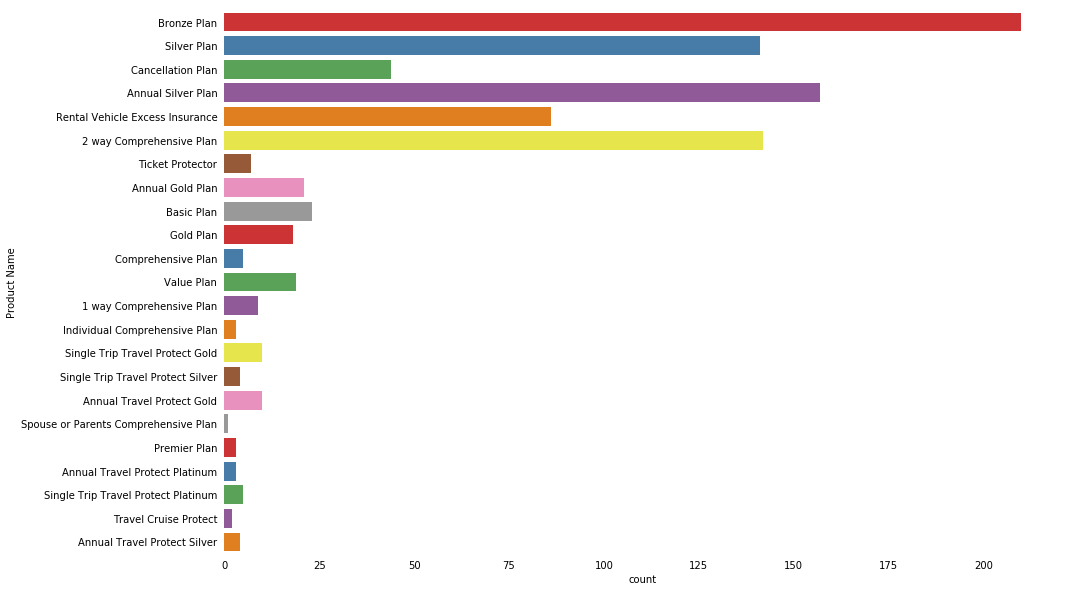

In [78]:
fig,ax1 = plt.subplots(figsize=(15,10))
sns.countplot(y = 'Product Name',data = data[data['Claim']=='Yes'],orient='v',ax=ax1,palette='Set1')

**5.Now let's analyze Age**

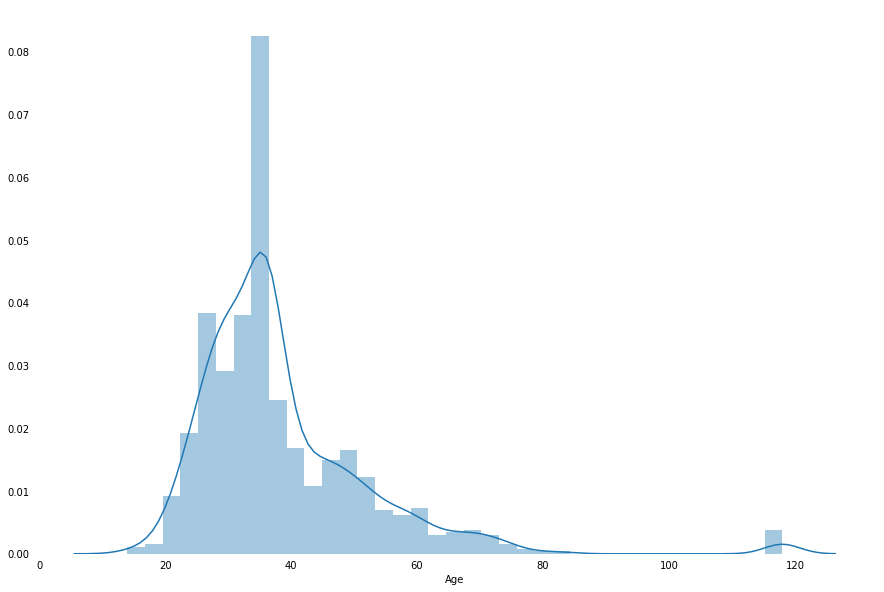

In [79]:
fig,ax1 = plt.subplots(figsize=(15,10))
sns.distplot(data[data['Claim']=='Yes']['Age'],ax=ax1)

In [80]:
data.loc[(data['Claim'] == 'Yes') & (data['Age'] == 118),:]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
24327,JWT,Airlines,Online,Value Plan,Yes,81,INDIA,124.0,49.60,118
24958,EPX,Travel Agency,Offline,2 way Comprehensive Plan,Yes,10,MALAYSIA,20.0,0.00,118
26018,JWT,Airlines,Online,Value Plan,Yes,51,INDIA,78.0,31.20,118
28717,CCR,Travel Agency,Offline,Comprehensive Plan,Yes,15,THAILAND,29.0,9.57,118
33354,JWT,Airlines,Online,Value Plan,Yes,10,INDIA,50.0,20.00,118
53563,ART,Airlines,Online,Value Plan,Yes,36,INDONESIA,29.0,10.15,118
54163,EPX,Travel Agency,Offline,1 way Comprehensive Plan,Yes,19,CHINA,33.0,0.00,118
54324,EPX,Travel Agency,Offline,1 way Comprehensive Plan,Yes,18,CHINA,33.0,0.00,118
56475,EPX,Travel Agency,Offline,2 way Comprehensive Plan,Yes,20,AUSTRALIA,37.0,0.00,118
60720,JWT,Airlines,Online,Value Plan,Yes,25,INDIA,78.0,31.20,118


In [81]:
cutpoints = [0,10,15,18,29,40,60,100,118]
label_names = ['child','pre-teen','teen','young-adult','adult','senior','old','outliers']
data['Age_Categories'] = pd.cut(data['Age'],cutpoints,labels=label_names)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Age_Categories
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,old
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,old
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,adult
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,adult
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,senior


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C6BAD30>],
      dtype=object)

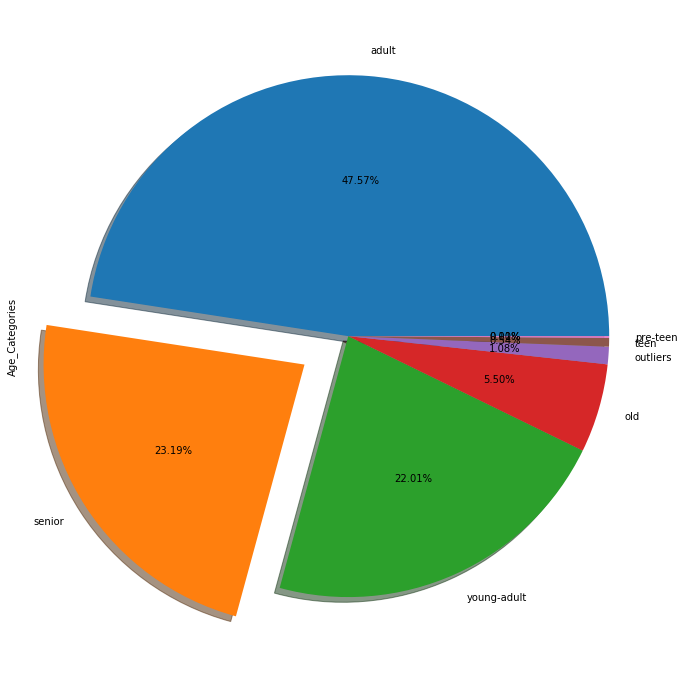

In [82]:
data[data['Claim']=='Yes']['Age_Categories'].value_counts().plot.pie(subplots=True,shadow=True,figsize=(12,12),autopct='%.2f%%',explode=[0,.2,0,0,0,0,0,0])

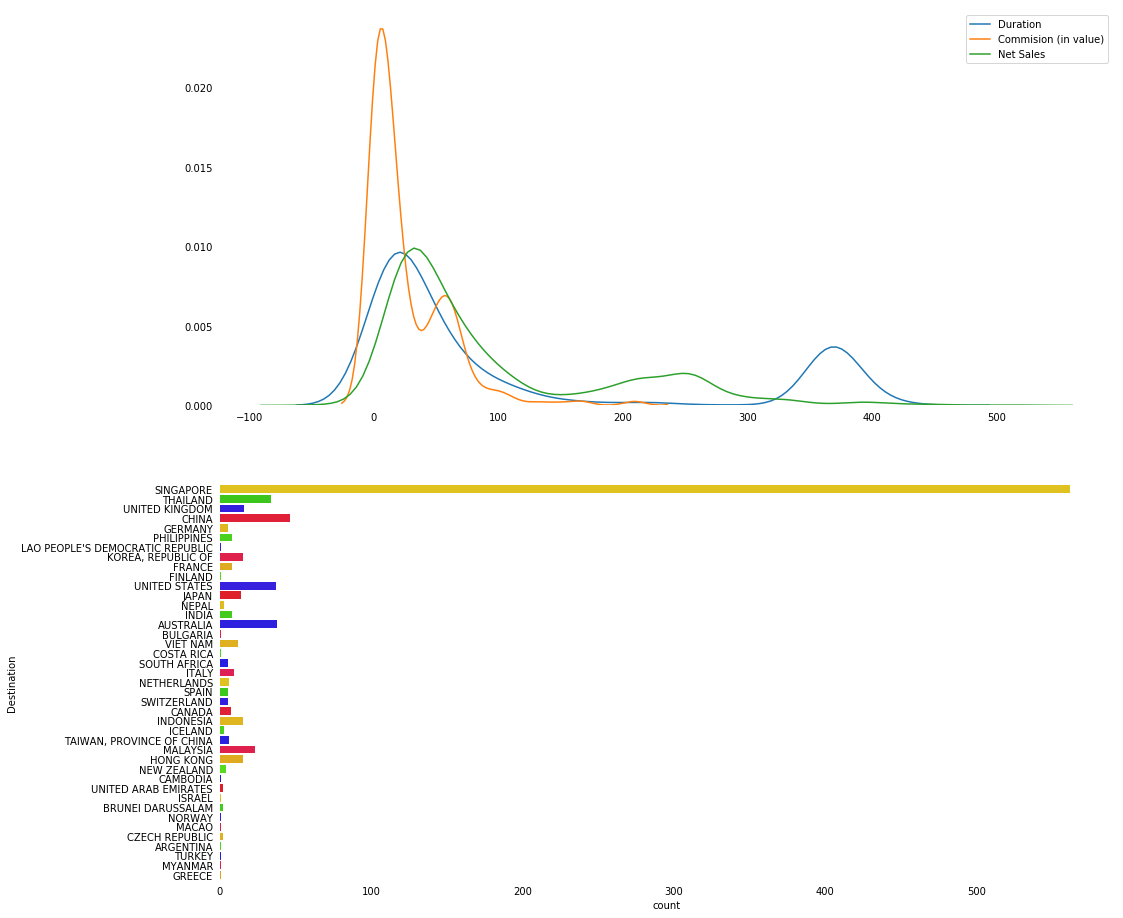

In [83]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

sns.kdeplot(data[data['Claim']=='Yes']['Duration'],ax=ax,)
sns.kdeplot(data[data['Claim']=='Yes']['Commision (in value)'],ax=ax)
sns.kdeplot(data[data['Claim']=='Yes']['Net Sales'],ax=ax)

sns.countplot(y ='Destination',data=data[data['Claim']=='Yes'],ax=ax1,palette='prism')


plt.show()

In [84]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Age_Categories
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,old
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,old
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,adult
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,adult
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,senior


In [85]:
len(data['Destination'].unique())

149

In [86]:
label_encode_AT = LabelEncoder()
data['Agency Type'] = label_encode_AT.fit_transform(data['Agency Type'])
label_encode_DC = LabelEncoder()
data['Distribution Channel'] = label_encode_DC.fit_transform(data['Distribution Channel'])
label_encode_CL = LabelEncoder()
data['Claim'] = label_encode_CL.fit_transform(data['Claim'])

In [87]:
dua = pd.get_dummies(data=data['Agency'],drop_first=True,prefix='Agency')
dupn = pd.get_dummies(data=data['Product Name'],drop_first=True,prefix='PN')
dudes = pd.get_dummies(data=data['Destination'],drop_first=True,prefix='DES')

data.drop(['Agency','Product Name','Destination','Age_Categories'],axis=1,inplace=True)
data = pd.concat([data,dua,dupn,dudes],axis=1)

data.head()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,...,DES_UNITED KINGDOM,DES_UNITED STATES,DES_URUGUAY,DES_UZBEKISTAN,DES_VANUATU,DES_VENEZUELA,DES_VIET NAM,"DES_VIRGIN ISLANDS, U.S.",DES_ZAMBIA,DES_ZIMBABWE
0,1,0,0,186,-29.0,9.57,81,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,186,-29.0,9.57,71,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,65,-49.5,29.70,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,60,-39.6,23.76,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,79,-19.8,11.88,41,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X = data.drop(['Claim'],axis=1).values
y = data['Claim'].values

In [98]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [100]:
#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Artificial neural networks model

In [130]:
classifier = Sequential()

classifier.add(Dense(units=97,kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 194))
classifier.add(Dense(units = 97, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
50660/50660 [==============================] - 13s 259us/step - loss: 0.0723 - acc: 0.9849
Epoch 2/100
50660/50660 [==============================] - 14s 285us/step - loss: 0.0674 - acc: 0.9855
Epoch 3/100
50660/50660 [==============================] - 18s 349us/step - loss: 0.0670 - acc: 0.9855
Epoch 4/100
50660/50660 [==============================] - 11s 224us/step - loss: 0.0667 - acc: 0.9855
Epoch 5/100
50660/50660 [==============================] - 16s 308us/step - loss: 0.0664 - acc: 0.9855
Epoch 6/100
50660/50660 [==============================] - 15s 290us/step - loss: 0.0663 - acc: 0.9855
Epoch 7/100
50660/50660 [==============================] - 16s 306us/step - loss: 0.0658 - acc: 0.9855
Epoch 8/100
50660/50660 [==============================] - 14s 272us/step - loss: 0.0658 - acc: 0.9855
Epoch 9/100
50660/50660 [==============================] - 15s 290us/step - loss: 0.0657 - acc: 0.9855
Epoch 10/100
50660/50660 [==============================] - 14s 274us/ste

50660/50660 [==============================] - 12s 238us/step - loss: 0.0628 - acc: 0.9854
Epoch 80/100
50660/50660 [==============================] - 12s 235us/step - loss: 0.0641 - acc: 0.9854
Epoch 81/100
50660/50660 [==============================] - 12s 236us/step - loss: 0.0636 - acc: 0.9854
Epoch 82/100
50660/50660 [==============================] - 12s 235us/step - loss: 0.0635 - acc: 0.9855
Epoch 83/100
50660/50660 [==============================] - 12s 238us/step - loss: 0.0633 - acc: 0.9854
Epoch 84/100
50660/50660 [==============================] - 12s 237us/step - loss: 0.0634 - acc: 0.9853
Epoch 85/100
50660/50660 [==============================] - 12s 235us/step - loss: 0.0629 - acc: 0.9854
Epoch 86/100
50660/50660 [==============================] - 24s 477us/step - loss: 0.0626 - acc: 0.9855
Epoch 87/100
50660/50660 [==============================] - 13s 258us/step - loss: 0.0626 - acc: 0.9855
Epoch 88/100
50660/50660 [==============================] - 12s 230us/step - 

In [131]:
y_pred = classifier.predict(X_test)

In [132]:
y_pred = (y_pred > 0.5)

In [133]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12467,     8],
       [  191,     0]], dtype=int64)

**Looks like our model is overfitting**

**Lets Evaluate our model**

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 97, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 194))
    classifier.add(Dense(units = 97, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()